In [42]:
import numpy as np
import os
import torch
import tensorflow as tf
import keras
import sys
import random
import cv2
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense
from ipywidgets import Image
from IPython.display import Image, display

In [44]:
seed = 20
np.random.seed = seed

In [111]:
imgH = 1024
imgW = 1024
imgC = 3 

trainXPath = r"C:\Users\ebudy\cellClass\train\trainXPNG"
trainYPath = r"C:\Users\ebudy\cellClass\train\trainYPNG"
testPath = r"C:\Users\ebudy\cellClass\test\testPNG"

Xtrain = np.zeros((10, imgH, imgW, imgC), dtype=np.uint8)
Ytrain = np.zeros((10, imgH, imgW, imgC), dtype=np.uint8)
Xtest = np.zeros((2, imgH, imgW, imgC), dtype=np.uint8)
newXtrain = np.zeros((10, imgH, imgW), dtype=np.uint8)
newYtrain = np.zeros((10, imgH, imgW), dtype=np.uint8)
newXtest = np.zeros((2, imgH, imgW), dtype=np.uint8)


for n, img in zip(range(0, 10), os.listdir(trainXPath)):
    fullPath = trainXPath + "\\"+ img
    im = cv2.imread(fullPath)
    Xtrain[n] = im
    l0, l1, l2 = cv2.split(Xtrain[n])
    for x in range(0, 1024):
        newXtrain[n][x] = (l0[x] + l1[x] + l2[x])/3
        
for n, img in zip(range(0, 10), os.listdir(trainYPath)):
    fullPath = trainYPath + "\\"+ img
    im = cv2.imread(fullPath)    
    Ytrain[n] = im
    l0, l1, l2 = cv2.split(Ytrain[n])
    for x in range(0, 1024):
        newYtrain[n][x] = (l0[x] + l1[x] + l2[x])/3
    
for n, img in zip(range(0, 2), os.listdir(testPath)):
    fullPath = testPath + "\\"+ img
    im = cv2.imread(fullPath)
    Xtest[n] = im
    l0, l1, l2 = cv2.split(Xtest[n])
    for x in range(0, 1024):
        newXtest[n][x] = (l0[x] + l1[x] + l2[x])/3

(1024, 1024)
(1024, 1024)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]]


'\nprint(Xtrain.min())\nim = cv2.resize(Xtrain[3], (200, 200))\nim = plt.imshow(im)\n'

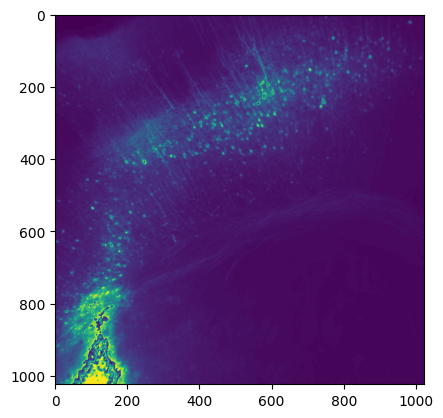

In [48]:
print(newXtrain[3].shape)

print(newXtrain[2].shape)
print(newXtrain[2])

plt.imshow(newXtrain[3])

In [50]:
#lol fuck this shi

In [52]:
inputs = tf.keras.layers.Input((imgH, imgW, 1))
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

In [54]:
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

In [56]:
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

In [58]:
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

In [60]:
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

In [62]:
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

In [64]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [66]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [68]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [69]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [70]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [71]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 1)]                                                              
                                                                                                  
 lambda_2 (Lambda)              (None, 1024, 1024,   0           ['input_3[0][0]']                
                                1)                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 1024, 1024,   160         ['lambda_2[0][0]']               
                                16)                                                         

                                                                                                  
 conv2d_50 (Conv2D)             (None, 256, 256, 64  73792       ['concatenate_9[0][0]']          
                                )                                                                 
                                                                                                  
 dropout_24 (Dropout)           (None, 256, 256, 64  0           ['conv2d_50[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 256, 256, 64  36928       ['dropout_24[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_tr

In [72]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('cellMaskModel.png', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(newXtrain, newYtrain, batch_size=10, epochs=1, callbacks=callbacks)

1/1 [==============================] - 135s 135s/step - loss: 0.6473 - accuracy: 0.2505


(10, 1024, 1024)
1/1 [==============================] - 7s 7s/step


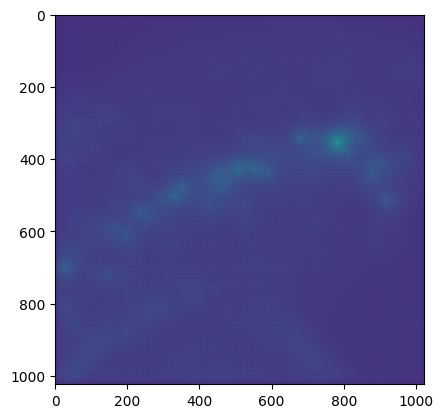

In [114]:
idx = random.randint(0, len(Xtrain))

print(newXtrain.shape)

preds_train = model.predict(newXtrain, verbose=1)
preds_val = model.predict(newXtrain, verbose=1)
preds_test = model.predict(newXtest, verbose=1)

ix = random.randint(0, 10)
newXtrain = plt.imshow(newXtrain[ix])
newYtrain = plt.imshow(newYtrain[ix])
preds_train_t = plt.imshow(preds_train[ix])